In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('german_credit.csv')

In [ ]:
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2


In [ ]:
df.shape

(1000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [ ]:
df.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

In [ ]:
df.nunique()

Creditability                          2
Account Balance                        4
Duration of Credit (month)            33
Payment Status of Previous Credit      5
Purpose                               10
Credit Amount                        923
Value Savings/Stocks                   5
Length of current employment           5
Instalment per cent                    4
Sex & Marital Status                   4
Guarantors                             3
Duration in Current address            4
Most valuable available asset          4
Age (years)                           53
Concurrent Credits                     3
Type of apartment                      3
No of Credits at this Bank             4
Occupation                             4
No of dependents                       2
Telephone                              2
Foreign Worker                         2
dtype: int64

In [ ]:
df.isnull().sum()

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

In [ ]:
df.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


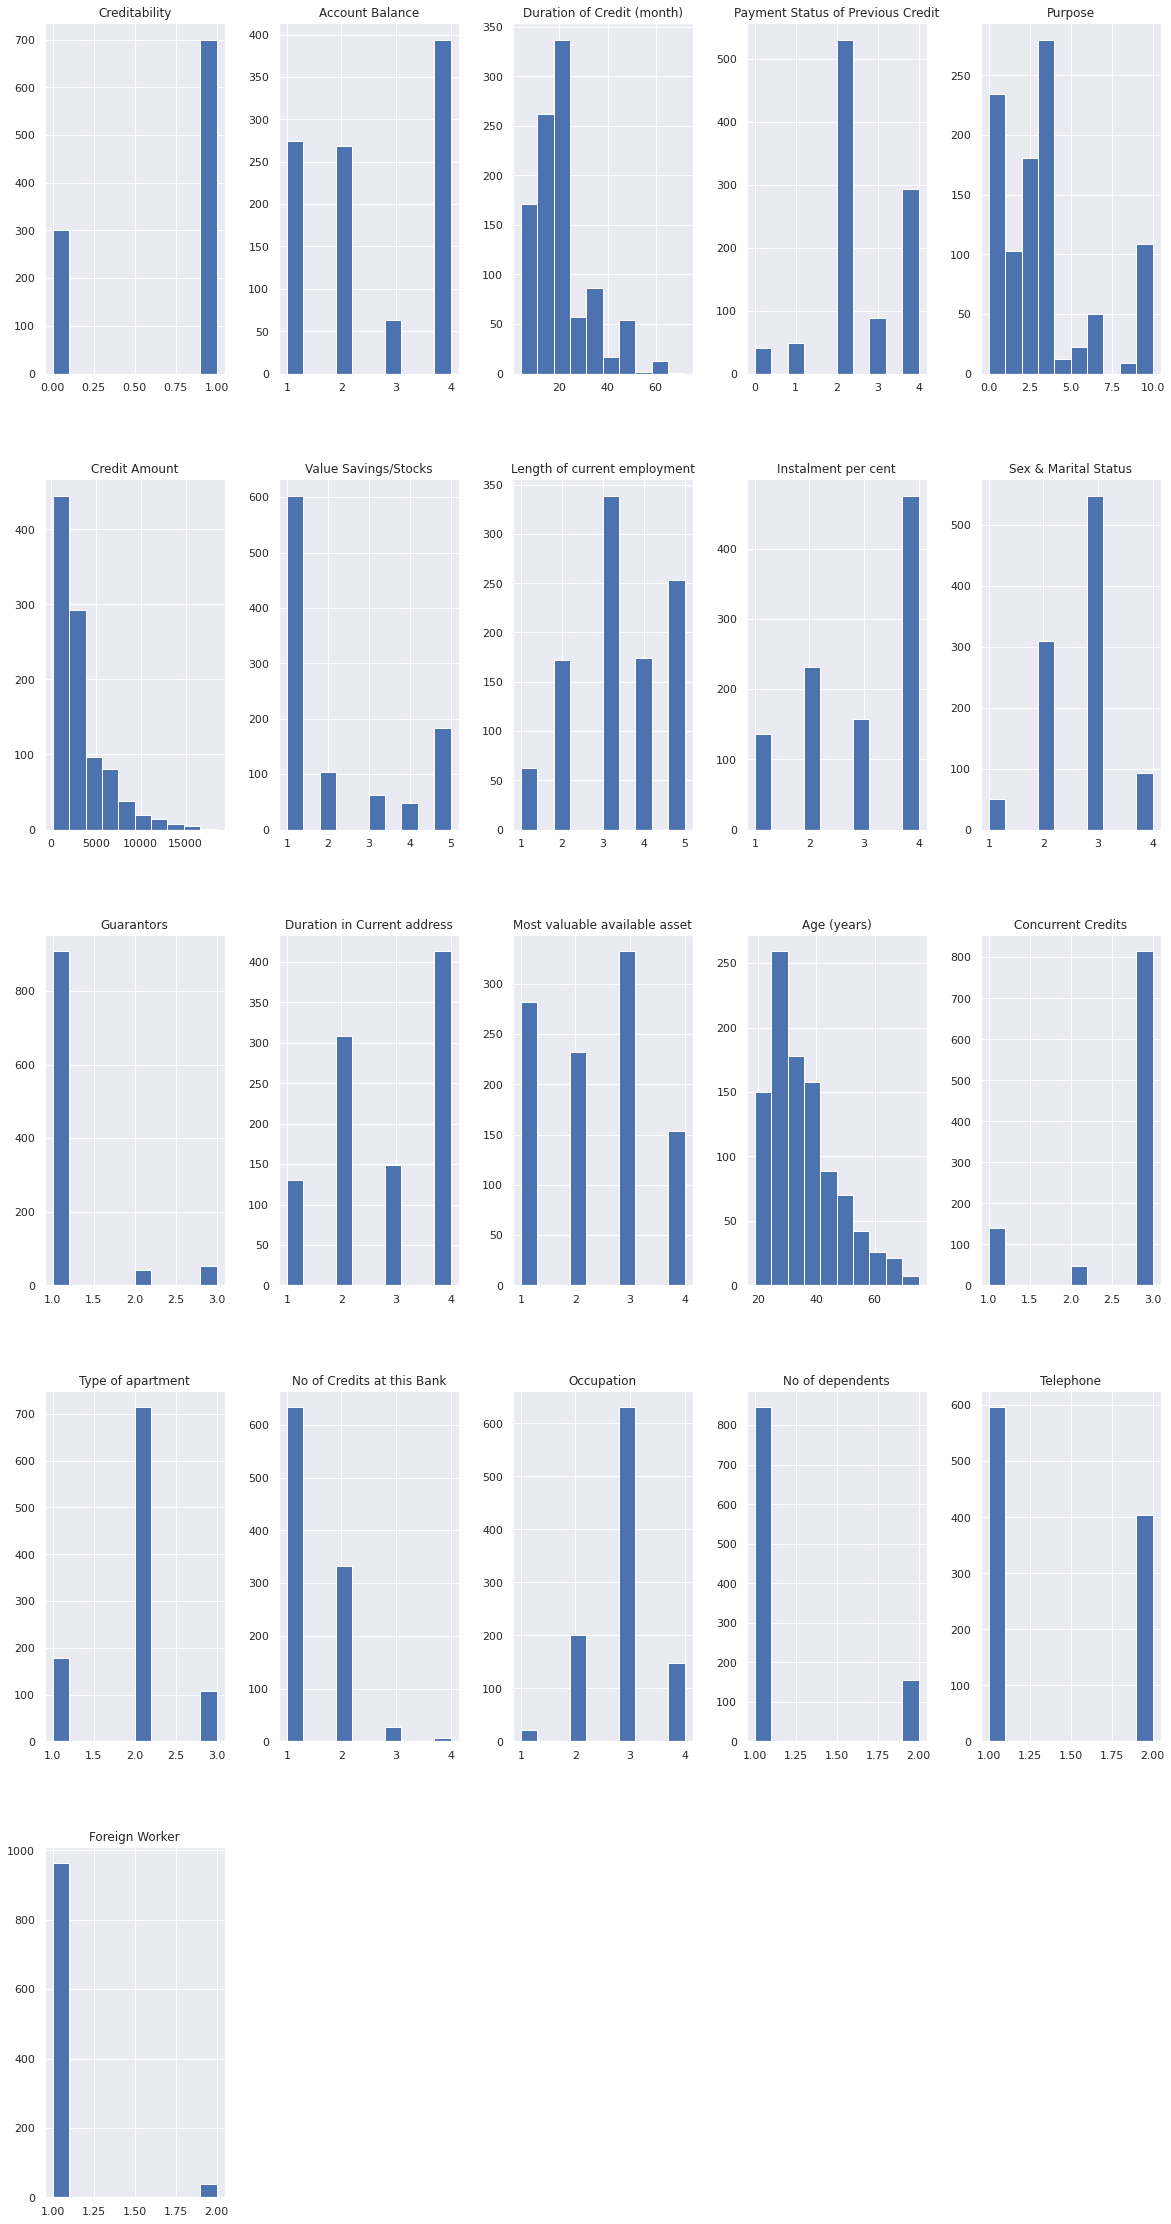

In [ ]:
df.hist(figsize=(20,40))
plt.show()

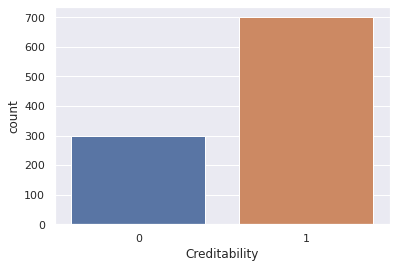

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
plt.ylabel("totalno of credit defaulters")
ax = sns.countplot(x="Creditability", data = df)
plt.show()


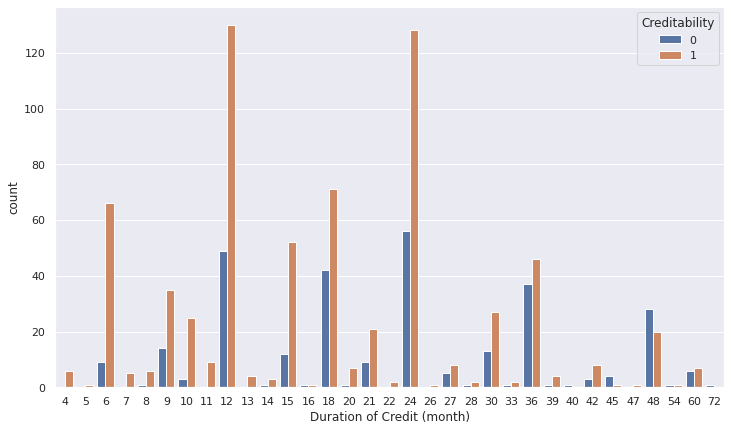

In [ ]:
plt.figure(figsize=(12,7))
g = sns.countplot(x = "Duration of Credit (month)", hue="Creditability", data = df)
plt.show()

In [ ]:
#1 male : divorced/seperate
#2 female: divorced/married/seperated
#3 male: single
#4 male: married
#5 female:single

#purpose
#0 : car(new)
#1 : car(used)
#2 : furniture

sexstatus = df.groupby(['Sex & Marital Status','Creditability'])["Purpose"].value_counts()
print(sexstatus.to_string())

Sex & Marital Status  Creditability  Purpose
1                     0              2            6
                                     9            5
                                     0            4
                                     3            3
                                     5            1
                                     6            1
                      1              2            9
                                     0            6
                                     9            5
                                     3            4
                                     1            3
                                     4            1
                                     5            1
                                     10           1
2                     0              0           32
                                     2           28
                                     3           19
                                     6            9
                   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


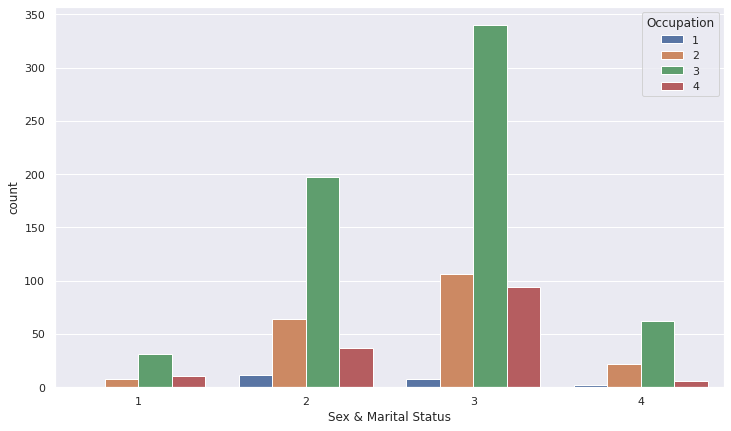

In [ ]:
#1 = unemployed/unskilled- nonresident
#2 - unskilled - resident
#3 - skilled employee / official
#4 - self-employed,employee,officer,management 

plt.figure(figsize = (12,7))
ax = sns.countplot("Sex & Marital Status", hue = "Occupation", data = df)
plt.show()

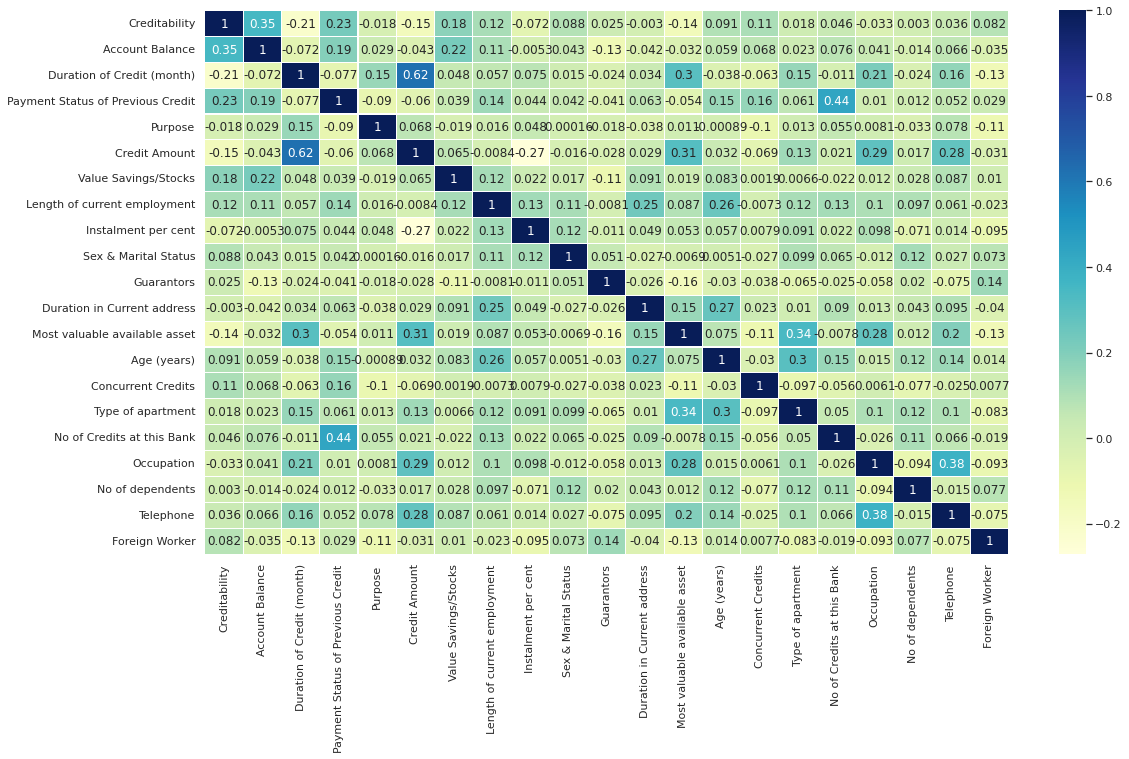

In [ ]:
corr = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr,annot = True,cmap = "YlGnBu",linewidths=0.1)
plt.show()

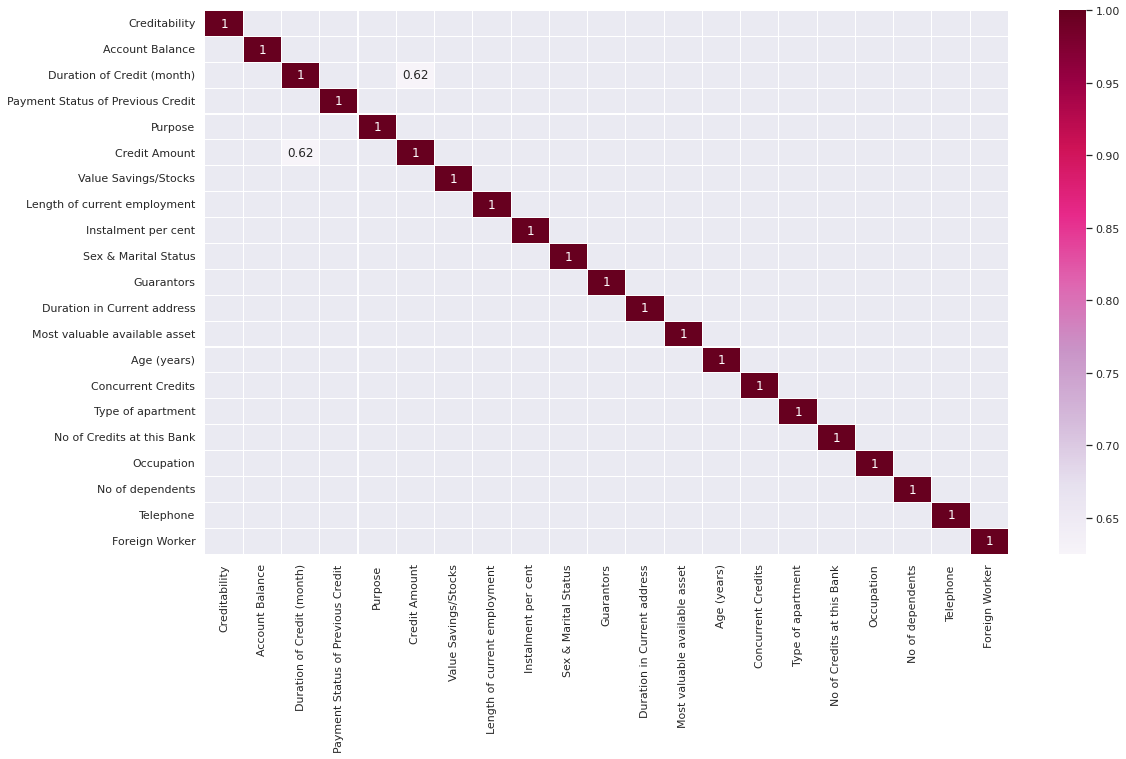

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(corr[(corr>=0.5)], annot = True, linewidths = 0.1, cmap = 'PuRd')
plt.show()

## CREDIT AMOUNT AND DURATION OF CREDIT MONTH ARE HIGHLY CORRELATED

In [ ]:
x = df.iloc[:,df.columns!="Creditability"]
y = df.iloc[:,df.columns == "Creditability"]

In [ ]:
print(y)

     Creditability
0                1
1                1
2                1
3                1
4                1
..             ...
995              0
996              0
997              0
998              0
999              0

[1000 rows x 1 columns]


In [ ]:
print(x)

     Account Balance  Duration of Credit (month)  ...  Telephone  Foreign Worker
0                  1                          18  ...          1               1
1                  1                           9  ...          1               1
2                  2                          12  ...          1               1
3                  1                          12  ...          1               2
4                  1                          12  ...          1               2
..               ...                         ...  ...        ...             ...
995                1                          24  ...          1               1
996                1                          24  ...          1               1
997                4                          21  ...          2               1
998                2                          12  ...          2               1
999                1                          30  ...          1               1

[1000 rows x 20 columns]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 1,test_size = 0.30)
print("x_train",x_train.shape)
print("y_train",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train (700, 20)
y_train (700, 1)
x_test (300, 20)
y_test (300, 1)


In [ ]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(x_train,y_train)
y_pred = logr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_pred,y_test)
matrix

array([[ 40,  20],
       [ 51, 189]])

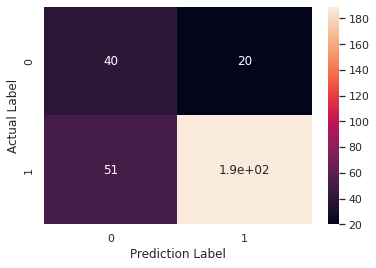

In [ ]:
#TP = actual value = CD, predicted = Not Cd,
#TN = actual value = not a CD, predicted = Not CD
#FP = actual value = not a CD, predicted = CD
#FN = actual value = CD, predicted = not a CD
sns.heatmap(pd.DataFrame(matrix), annot = True)
plt.xlabel("Prediction Label")
plt.ylabel("Actual Label")
plt.show()

In [ ]:
# Accuracy = TP + TN / TP + TN + FP +FN
#PRECISION = TP/TP+FP
#RECALL = TP/TP+FN
#f1 score
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("recall:",metrics.recall_score(y_test,y_pred))

Accuracy: 0.7633333333333333
Precision: 0.7875
recall: 0.9043062200956937


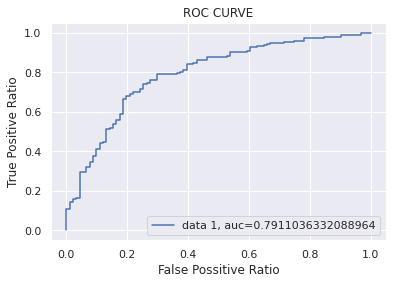

In [ ]:
y_pred_proba = logr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label = "data 1, auc=" + str(auc))
plt.xlabel("False Possitive Ratio")
plt.ylabel("True Positive Ratio")
plt.title("ROC CURVE")
plt.legend(loc = 4)
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits = 3, random_state = 7,shuffle=True)
result = cross_val_score(logr,x_train,y_train,cv=kfold,scoring='accuracy')
print(result.mean())

0.7386070454739982


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

In [ ]:
print(result)

[0.71367521 0.75107296 0.75107296]


In [ ]:
from sklearn.model_selection import GridSearchCV
dual = [True,False]
max_iter = [100,110,120,130,140]
param_grid = dict(dual = dual,max_iter = max_iter)
import time
lr = LogisticRegression(penalty = 'l2')
grid = GridSearchCV(estimator = lr,param_grid=param_grid,cv=3,n_jobs=1)
start_time = time.time()
grid_result = grid.fit(x_train,y_train)
print("best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))
print("Execution time" +str((time.time() - start_time))+ "ms")


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

best: 0.742850 using {'dual': False, 'max_iter': 100}
Execution time1.0048553943634033ms


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator = lr,param_distributions=param_grid, cv = 3, n_jobs = 1)
start_time = time.time()
random_result = random.fit(x_train,y_train)

print("Best score:%f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time" +str((time.time() - start_time)) + "ms")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Best score:0.742850 using {'max_iter': 100, 'dual': False}
Execution time1.1089696884155273ms


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
#create a decision tree object
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3)

#train decision tree using classifier
dt = dt.fit(x_train,y_train)

#predict the response from the test data
y_pred = dt.predict(x_test)

In [ ]:
print("The Accuracy Score is:",metrics.accuracy_score(y_test,y_pred))


The Accuracy Score is: 0.7366666666666667


## VISUALIZING GRAPH

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
#from sklearn.externals.six import StringIo
from sklearn import tree
import collections

In [ ]:
feature_columns = ['Status_of_existing_account','Duration_of_Credit_month','Payment_Status_of_Previous_Credit(Credit history)', 'Purpose_of_loan','Credit_Amount','Value_of_Savings_account&bonds','Years_of_Present_Employment','Percentage_of_disposable_income','Sex_&_Marital_Status','Guarantors/Debators','Duration_in_Present_Residence','Property','Age_in_years','Concurrent_Credits','Housing','No_of_Credits_at_this_Bank','Occupation','No_of_dependents','Telephone','Foreign_Worker']

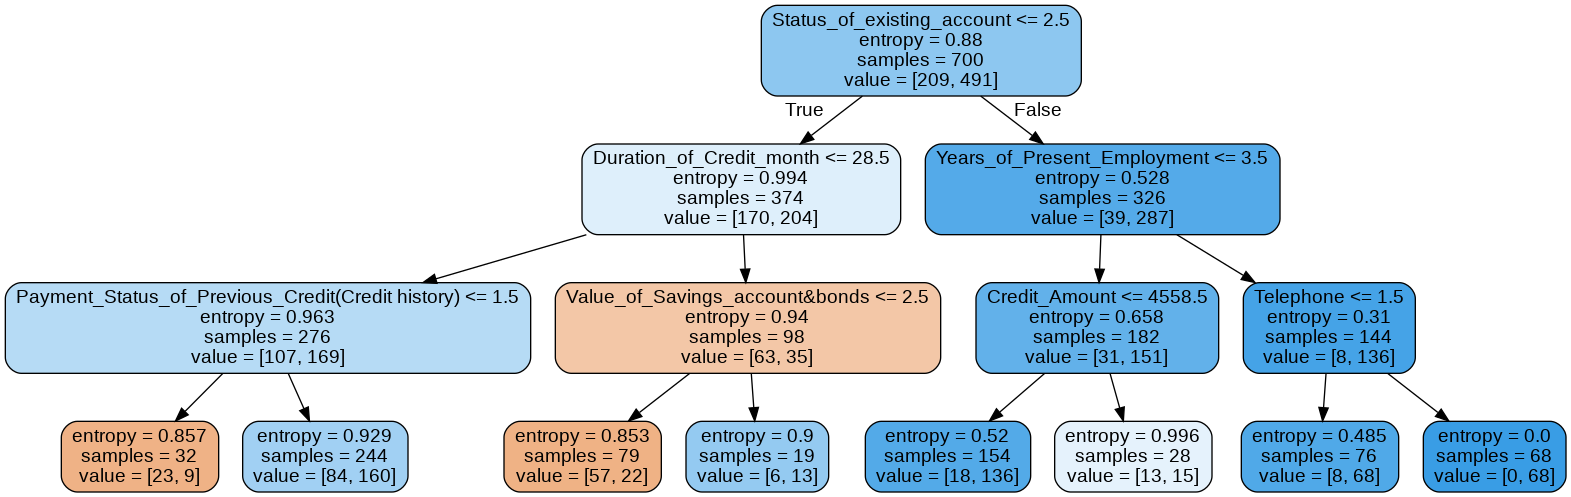

In [ ]:
dot_data = tree.export_graphviz(dt,feature_names=feature_columns,out_file=None,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise','orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
  edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
  edges[edge].sort()
  for i in range(2):
    dest = graph.get_node(str(edges[edge][i]))[0]

graph.write_png('tree.png')
Image(graph.create_png())

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50,max_depth=10)

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [ ]:
from sklearn import metrics

print("Accuracy score:",metrics.accuracy_score(y_test,y_pred))


Accuracy score: 0.7666666666666667
